In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import highlight_text 
from PIL import Image

In [64]:
league = 'Championship'
team = 'Norwich City'

In [65]:
df = pd.read_html('https://fbref.com/en/players/e082af5b/matchlogs/2023-2024/c10/Angus-Gunn-Match-Logs', attrs = {"id" : "matchlogs_2023-2024_10"})[0]

In [66]:
df.columns = df.columns.droplevel(0)
df.dropna(inplace = True)

In [67]:
df2 = pd.read_html('https://fbref.com/en/players/e082af5b/matchlogs/2022-2023/c10/Angus-Gunn-Match-Logs', attrs = {"id" : "matchlogs_2022-2023_10"})[0]

In [68]:
df2.columns = df2.columns.droplevel(0)
df2.dropna(inplace = True)
df2.reset_index(drop = True, inplace = True)

In [69]:
for x in range(len(df2)):
    if df2['Pos'][x] != 'GK':
        df2.drop(x, inplace = True)

In [70]:
df = pd.concat([df, df2], ignore_index = True)

In [71]:
df.sort_values(by = 'Date', inplace = True)
df.reset_index(drop = True, inplace = True)

In [72]:
pd.set_option('display.max_rows', None)

In [73]:
df['PSxG'] = df['PSxG'].astype(float)
df['GA'] = df['GA'].astype(float)
df['PSxG Prevented'] = df['PSxG'] - df['GA']

In [74]:
df['PSxG Prevented MA'] = df['PSxG Prevented'].rolling(window=10).mean()

In [75]:
df['Match'] = range(1, len(df) + 1) 

In [76]:
X = df['Match']
Y_for = df['PSxG Prevented MA']

Text(37.27777777777777, 0.5, 'npxG/Sh')

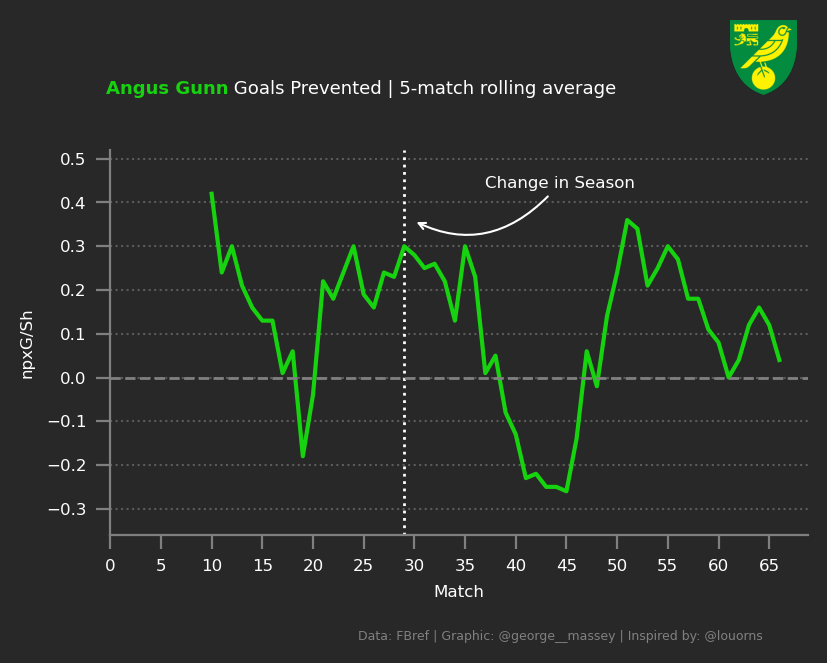

In [84]:
fig = plt.figure(figsize=(4.5, 2.5), dpi = 200, facecolor = "#282828")
ax = plt.subplot(111, facecolor = "#282828")

# Remove top & right spines and change the color.
ax.spines[["top", "right"]].set_visible(False)
#ax.tick_params(axis='y', left=False)
ax.spines[["left", "bottom"]].set_color("grey")

# Set the grid
ax.grid(
    axis='y',
    visible = True, 
    lw = 0.75,
    ls = ":",
    alpha = 0.3,
    color = "lightgrey"
)

line_1 = ax.plot(X, Y_for, color = "#16D20F", zorder = 4)
line_2 = ax.axhline(y=0, color='grey', linestyle='--', linewidth=1, zorder=5, label = 'Average npxG/Sh')
ax.set_ylim(df['PSxG Prevented MA'].min() - 0.1, df['PSxG Prevented MA'].max() + 0.1)

 #Add a line to mark the division between seasons
ax.plot(
    [29,29], # 38 games per season
    [ax.get_ylim()[0], ax.get_ylim()[1]],
    ls = ":",
    lw = 1,
    color = "white",
    zorder = 2
)

# Annotation with data coordinates and offset points.
ax.annotate(
    xy = (29, .37),
    xytext = (29, 10),
    textcoords = "offset points",
    text = "Change in Season",
    size = 6,
    color = "white",
    arrowprops=dict(
        arrowstyle="->", shrinkA=0, shrinkB=5, color="white", linewidth=0.75,
        connectionstyle="angle3,angleA=50,angleB=-30"
    ) # Arrow to connect annotation
)
# Fill between
#ax.fill_between(
 #   X, 
  #  average,
   # Y_for, 
   # where = Y_for >= average, 
   # interpolate = True,
   # alpha = 0.85,
   # zorder = 3,
   # color = line_1[0].get_color()
#)

#ax.fill_between(
 #   X, 
  #  average,
   ## Y_for, 
    #where = average > Y_for, 
   # interpolate = True,
   # alpha = 0.85,
   # color = line_2[0].get_color()
#)

# Customize the ticks to match spine color and adjust label size.
ax.tick_params(
    color = "grey", 
    length = 5, 
    which = "major", 
    labelsize = 6,
    labelcolor = "white",
    zorder = 3
)

# Set x-axis major tick positions to only 19 game multiples.
ax.xaxis.set_major_locator(ticker.MultipleLocator(10))
# Set y-axis major tick positions to only 0.5 xG multiples.
#ax.yaxis.set_major_locator(ticker.MultipleLocator(0.5))

# Title and subtitle for the legend
highlight_text.fig_text(
    x = 0.12, y = 1.02,
    s = f"<Angus Gunn> Goals Prevented | 5-match rolling average",
    highlight_textprops = [
        {"color": line_1[0].get_color(), "weight": "bold"}
    ],
    color = "white",
    size = 6.5,
    #annotationbbox_kw={"xycoords": "figure fraction"}
)
fig.text(0.4, -0.1, "Data: FBref | Graphic: @george__massey | Inspired by: @louorns", size = 4.5, color = "grey")
badge_url = f"C:/Users/George/Documents/Football Analytics/Team Logos/{team}_logo.png"

logo_ax = fig.add_axes([0.75, .99, 0.2, 0.15], zorder=1)
club_icon = Image.open(badge_url)
logo_ax.imshow(club_icon)
logo_ax.axis("off")
ax.set_xticks(range(0, len(df['Match'])+1, 5))
ax.set_xlabel('Match', color = "white", fontsize = 6)
ax.set_ylabel('npxG/Sh', color = "white", fontsize = 6)